# Hypothesis Testing

# Lesson Objectives

1. Establish the basic framework and vocabulary for hypothesis testing
2. Define Null and Alternative Hypothesis
3. Define p-value, alpha, Type 1 and Type 2 Errors
4. Define and perform Z-tests
5. Define and perform T-tests: 1 sample and 2 sample
6. Describe the relationship between Statistical Power and Effect Sizes.

## Scenarios

- Chemistry - do inputs from two different barley fields produce different
yields?
- Astrophysics - do star systems with near-orbiting gas giants have hotter
stars?
- Medicine - does blood pressure lower for those who were given treatment?
- Business - which ad is more effective given engagement?

![img1](./img/img1.png)

![img2](./img/img2.png)

# Basic framework and assumptions for hypothesis testing

### High Level Hypothesis Testing
1. Start with a Scientific Question (yes/no)
2. Take the skeptical stance (Null hypothesis) 
3. State the complement (Alternative)
4. Create a model of the situation Assuming the Null Hypothesis is True!
5. Decide how surprised you would need to be in order to change your mind

**Intuition** 

Suppose you have a large dataset for a __population___. The data is normally distributed with mean 0 and standard deviation 1. ___ Would you every have this????____

Along comes a new sample with a sample mean of 2.9.

> The idea behind hypothesis testing is a desire to quantify our belief as to whether our sample of observations came from the same population as the original dataset. 

According to the empirical (68–95–99.7) rule for normal distributions there is only roughly a 0.003 chance that the sample came from the same population, because it is roughly 3 standard deviations above the mean. 

<img src="img/normal_sd_new.png" width="500">
 
To formalize this intuition, we define an threshold value for deciding whether we believe that the sample is from the same underlying population or not. This threshold is $\alpha$, the **significance threshold**.  

This serves as the foundation for hypothesis testing where we will reject or fail to reject the null hypothesis.


# Hypothesis Testing Steps

1. Set up null and alternative hypotheses

2. Specify the appropriate statistical test

3. Choose a significance level (alpha)

4. Determine the critical value of test statistic or p-value (find the region of rejection)

5. Calculate the observed value of the test statistic

6. Make a decision (reject or fail to reject) regarding the Null Hypothesis by comparing the observed value of the test-statistic with critical value.

## Step 1 - Define Null and Alternative Hypotheses


### The Null Hypothesis

![](./img/same.gif) 

There is NOTHING, **no** difference.


### The Alternative hypothesis

![difference](./img/giphy.gif)

If we're testing the function of a new drug, then the null hypothesis will say that the drug has _no effect_ on patients, or anyway no effect relative to relief of the malady the drug was designed to combat. 

If we're testing whether Peeps cause dementia, then the null hypothesis will say that there is _no correlation_ between Peeps consumption and rate of dementia development.

![peeps](https://media.giphy.com/media/j3kh0AAZfeNP2/giphy.gif)

# One tailed vs two tailed tests

![](img/one_tailed.png)

![](img/two_tailed.png)

## Two Tail Hypothesis

$\Large H_0: \mu_1 - \mu_2 = 0  $  
$\Large H_1: \mu_1 - \mu_2 \neq 0  $
    
## Left Tail Hypothesis

$\Large H_0: \mu_1 >= \mu_2   $  
$\Large H_1: \mu_1 < \mu_2  $
    
## Right Tail Hypothesis
$\Large H_0: \mu_1  <= \mu_2   $  
$\Large H_1: \mu_1  > \mu_2  $

# Write the hypotheses

1. A drug manufacturer claims that a drug increases memory. It designs an experiment where both control and experimental groups are shown a series of images, and records the number of correct recollections until an error is made for each group. 

Answer  
$

2. An online toystore claims that putting a 5 minute timer on the checkout page of it website decreases conversion rate. It sets up two versions of its site, one with a timer and one with no timer. 

Answer  
$

3. The Kansas City public school system wants to test whether the scores of students who take standardized tests under the supervision of teachers differ from the scores of students who take them in rooms with school administrators.

Answer  
$

4. A pest control company believes that the length of cockroach legs in colonies which have persisted after two or more insecticide treatements are longer than those in which have not been treated to insecticide.

Answer  
$

5. A healthcare company believes patients between the ages of 18 and 25 participate in annual checkups less than all other age groups.

Answer  
$

# 3. Define p-value, alpha, type I/II errors

## $p$-Values

The basic idea of a p-value is to quantify the probability that the results seen are in fact the result of mere random chance. This is connected with the null hypothesis since, if the null hypothesis is true and there is no significant correlation between the population variables X and Y, then of course any correlation between X and Y observed in our sample would have to be the result of mere random chance.

### How Unlikely Is Too Unlikely?

## $Alpha: \alpha$

Suppose we calculate a p-value for some statistic we've measured (more on this below!) and we get a p-value of 20%. This would mean that there is a 20% chance that the results we observed were the result of mere random chance. Probably this is high enough that we ought _not_ to reject the null hypothesis that our variables are uncorrelated.

In practice, a p-value _threshold_ ($\Large \alpha$) of 5% is very often the default value for these tests of statistical significance. Thus, if it is calculated that the chance that the results we observed were actually the result of randomness is less than 1 in 20, then we would _reject_ the null hypothesis and _accept_ the alternative hypothesis.

If $p \lt \alpha$, we reject the null hypothesis.:

If $p \geq \alpha$, we fail to reject the null hypothesis.

> **We do not accept the alternative hypothesis, we only reject or fail to reject the null hypothesis in favor of the alternative.**

* We do not throw out failed experiments! 
* We say "this methodology, with this data, does not produce significant results" 
    * Maybe we need more data!

**CAUTION** We have to determine our $\alpha$ level, i.e. the threshold for an acceptible p-value, before we conduct our tests. Otherwise, we will be accused of p-hacking.

## Type 1 Errors (False Positives) and Type 2 Errors (False Negatives)
Most tests for the presence of some factor are imperfect. And in fact most tests are imperfect in two ways: They will sometimes fail to predict the presence of that factor when it is after all present, and they will sometimes predict the presence of that factor when in fact it is not. Clearly, the lower these error rates are, the better, but it is not uncommon for these rates to be between 1% and 5%, and sometimes they are even higher than that. (Of course, if they're higher than 50%, then we're better off just flipping a coin to run our test!)

Predicting the presence of some factor (i.e. counter to the null hypothesis) when in fact it is not there (i.e. the null hypothesis is true) is called a "false positive". Failing to predict the presence of some factor (i.e. in accord with the null hypothesis) when in fact it is there (i.e. the null hypothesis is false) is called a "false negative".


How does changing our alpha value change the rate of type 1 and type 2 errors?

Text(1.35, 0.25, 'Alpha: .5')

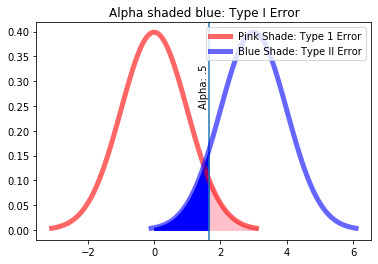

In [39]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

y = np.linspace(stats.norm(0,1).ppf(0.001),
             stats.norm(0,1).ppf(0.999), 100)

alpha = stats.norm(0,1).ppf(.95)


ax.plot(y, stats.norm(0,1).pdf(y), 'r-', lw=5, alpha=0.6, label='Pink Shade: Type 1 Error')
ax.axvline(alpha)

px = np.arange(stats.norm(0,1).ppf(0.95), stats.norm(0,1).ppf(.999), .001)
ax.fill_between(px, stats.norm(0,1).pdf(px), color = 'pink')

ax.set_title('Alpha shaded blue: Type I Error')


x = np.linspace(stats.norm(3,1).ppf(0.001),
             stats.norm(3,1).ppf(0.999), 100)

ax.plot(x, stats.norm(3,1).pdf(x), 'b-', lw=5, alpha=0.6, label='Blue Shade: Type II Error')


px = np.arange( stats.norm(0,1).ppf(.5),stats.norm(0,1).ppf(0.95), .001)
ax.fill_between(px, stats.norm(3,1).pdf(px), color='blue')
ax.legend(loc='upper right')

ax.set_title('Alpha shaded blue: Type I Error')
ax.text(1.35, .25, 'Alpha: .5', rotation = 90)

In [40]:
px = np.arange( stats.norm(0,1).ppf(.05),stats.norm(3,1).ppf(0.001), .001)
px

array([-1.64485363, -1.64385363, -1.64285363, ..., -0.09285363,
       -0.09185363, -0.09085363])

# Z-Tests 

![z](https://media.giphy.com/media/4oku9cpYuCNwc/giphy.gif)

A z-test is used when you know the population mean and standard deviation.

Our test statistic is the z-stat.

For a single point in relation to a distribution of points:

$z = \dfrac{{x} - \mu}{\sigma}$



for a single data point $x$ is equal to a data point, $\mu$ equals the mean of the standard distribution, and $\sigma$ is the standard deviation of the standard distribution.

<br>Our z score tells us how many standard deviations away from the mean our point is.
<br>We assume that the sample population is normally destributed, and we are familiar with the empirical rule: <br>66:95:99.7

![](img/Empirical_Rule.png)


Because of this, we can say, with a z-score of approximately 2, our data point is 2 standard deviations from the mean, and therefore has a probability of appearing of 1-.95, or .05. 

Yesterday, we performed the encountered the following example: Assume the mean height for women in the use is normally distributed with a mean of 65 inches and a standard deviation of 4 inches. What is the z-score of a woman who is 75 inches tall? 
    

In [41]:
z_score = (75 - 65)/4
print(z_score)

2.5


When we are working with a sampling distribution, the z score is equal to <br><br>  $\Large z = \dfrac{{\bar{x}} - \mu_{0}}{\dfrac{\sigma}{\sqrt{n}}}$

## Variable review: 

Where $\bar{x}$ equals the sample mean.
<br>$\mu_{0}$ is the mean associated with the null hypothesis.
<br>$\sigma$ is the population standard deviation
<br>$\sqrt{n}$ is the sample size, which reflects that we are dealing with a sample of the population, not the entire population.

The denominator $\frac{\sigma}{\sqrt{n}}$, is the standard error

Standard error is the standard deviation of the sampling mean. We will go into that further, below.

Once we have a z-stat, we can use a [z-table](http://www.z-table.com/) to find the associated p-value.

In [42]:
import numpy as np
sample_female_heights = [68, 65, 69, 70, 70, 
                         61, 59, 65, 64, 66,
                         72, 71, 68, 66, 64,
                         65, 65, 70, 71, 63, 
                         72, 66, 65, 65, 72]

x_bar = np.mean(sample_female_heights)
mu = 65
n = len(sample_female_heights)
std = 4

z = (x_bar - mu)/(4/np.sqrt(n))
z

2.3499999999999943

In [43]:
from scipy import stats
# we can use stats to calculate the percentile
print(stats.norm.cdf(z))
# We can also use the survival function to calculate the probability
print(stats.norm.sf(z)) 
# What does the survival function look like to you?

0.9906132944651613
0.009386705534838714


# Let's first work through a computational method of hypothesis testing.


Let's work with the normal distribution, since it's so useful. Suppose we are told that African elephants have weights distributed normally around a mean of 9000 lbs., with a standard deviation of 900 lbs. Pachyderm Adventures has recently measured the weights of 40 African elephants in Gabon and has calculated their average weight at 8637 lbs. They claim that these statistics on the Gabonese elephants are significant. Let's find out!

In [44]:
# Code for me:

mccalister = ['Adam', 'Amanda','Chum', 'Dann', 
 'Jacob', 'Jason', 'Johnhoy', 'Karim', 
'Leana','Luluva', 'Matt', 'Maximilian', ]

new_choice = np.random.choice(mccalister)
print(new_choice)
mccalister.remove(new_choice)

Chum


What is our null hypothesis?

>

What is our alternative hypothesis?

What is our alpha?

In [45]:
import numpy as np
np.random.seed(42)
# So, to computationally simulate a sample, using numpy's random.normal function.




In [46]:
# We want to take a bunch of these samples, say 1000. 

# From the central limit theorom, we know that the distribution of
# the means of a random sample will become more normal as the number of samples
# taken increases.

# So let's take the means of 1000 samples and store them in a list



In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# let's create the cumulative distribution function for the random sample

rm = sorted(random_means)
count = 0
cdf_dict = {rm[0]: count/len(rm)}

for i in range(1, len(rm)):
    if rm[i] > rm[i-1]:
        count += 1
        cdf_dict[rm[i]] = count/len(rm)
    
    else:
        count += 1

        
plt.plot(list(cdf_dict.keys()), list(cdf_dict.values()))
plt.title("CDF of mean weights of African Elephants")
plt.xlabel('Weight (lbs)')
plt.ylabel('CDF')

plt.plot()
plt.show();

NameError: name 'random_means' is not defined

In [48]:
# That looks similar to the cdf of a normal curve.

Now let's count how many times the means from the sample distribution were less than the mean weight of the Gabonese elephants.

In [49]:
# Code

In [50]:
# That is below our alpha value of .05, so we can reject the null hypothesis!

In [51]:
ax = sns.distplot(random_means)
plt.axvline(8637)
plt.text(8575, .0015, 'Gabonese', rotation = 90)

kde_x, kde_y = ax.lines[0].get_data()

ax.fill_between(kde_x, kde_y, where=(kde_x<8637), 
                interpolate=True, color='red')

NameError: name 'random_means' is not defined

In [52]:
# Let's calculate the standard error, which is how far we expect our estimate to be off on average. (111)

def mse(sample, mean):
    return None

rmse = np.sqrt(mse(random_means, 9000))
f"We expect the estimate to be off by {rmse: .2f} lbs on average."


NameError: name 'random_means' is not defined

Remember we gave the formula for standard error before as $\frac{\sigma}{\sqrt{n}}$
<br> Let's calculate that with our elephant numbers.

In [53]:
se = 900/np.sqrt(40)
se
# pretty close

142.30249470757707

Now let's calculate the z-score analytically.
Remember the formula for z-score:
$z = \dfrac{{\bar{x}} - \mu_{0}}{\dfrac{\sigma}{\sqrt{n}}}$

In [54]:
x_bar = 8637
mu = 9000
se = 142.3

z = (x_bar - mu)/se
z



-2.5509486999297257

In [55]:
# Looking it up on the z -table ~ .005 
p = 1 - .005
p

0.995

In [56]:
# or
from scipy import stats
stats.norm.cdf(z)

0.005371506876180296

In [57]:
# or
stats.norm.sf(z)

0.9946284931238197

# T-Tests

# z-tests vs t-tests

According to the **Central Limit Theorem**, the sampling distribution of a statistic, like the sample mean, will follow a normal distribution _as long as the sample size is sufficiently large_. 

__What if we don't have large sample sizes?__

When we do not know the population standard deviation or we have a small sample size, the sampling distribution of the sample statistic will follow a t-distribution.  
* Smaller sample sizes have larger variance, and t-distributions account for that by having heavier tails than the normal distribution.
* t-distributions are parameterized by degrees of freedom, fewer degrees of freedom fatter tails. Also converges to a normal distribution as dof >> 0

# One-sample z-tests and one-sample t-tests

One-sample z-tests and one-sample t-tests are hypothesis tests for the population mean $\mu$. 

How do we know whether we need to use a z-test or a t-test? 

<img src="img/z_or_t_test.png" width="500">


**When we perform a hypothesis test for the population mean, we want to know how likely it is to obtain the test statistic for the sample mean given the null hypothesis that the sample mean and population mean are not different.** 

The test statistic for the sample mean summarizes our sample observations. How do test statistics differ for one-sample z-tests and t-tests? 

A t-test is like a modified z-test. 

* Penalize for small sample size: "degrees of freedom"

* Use sample standard deviation $s$ to estimate the population standard deviation $\sigma$.

<img src="img/img5.png" width="500">



### T and Z in detail
![img4](./img/img4.png)

## One-sample z-test

* For large enough sample sizes $n$ with known population standard deviation $\sigma$, the test statistic of the sample mean $\bar x$ is given by the **z-statistic**, 
$$Z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$$ where $\mu$ is the population mean.  

* Our hypothesis test tries to answer the question of how likely we are to observe a z-statistic as extreme as our sample's given the null hypothesis that the sample and the population have the same mean, given a significance threshold of $\alpha$. This is a one-sample z-test.  

## One-sample t-test

* For small sample sizes or samples with unknown population standard deviation, the test statistic of the sample mean is given by the **t-statistic**, 
$$ t = \frac{\bar{x} - \mu}{s/\sqrt{n}} $$ Here, $s$ is the sample standard deviation, which is used to estimate the population standard deviation, and $\mu$ is the population mean.  

* Our hypothesis test tries to answer the question of how likely we are to observe a t-statistic as extreme as our sample's given the null hypothesis that the sample and population have the same mean, given a significance threshold of $\alpha$. This is a one-sample t-test.

## Compare and contrast z-tests and t-tests. 
In both cases, it is assumed that the samples are normally distributed. 

A t-test is like a modified z-test:
1. Penalize for small sample size; use "degrees of freedom" 
2. Use the _sample_ standard deviation $s$ to estimate the population standard deviation $\sigma$. 

T-distributions have more probability in the tails. As the sample size increases, this decreases and the t distribution more closely resembles the z, or standard normal, distribution. By sample size n = 1000 they are virtually indistinguishable from each other. 

As the degrees of freedom go up, the t-distribution gets closer to the normal curve.

After calculating our t-stat, we compare it against our t-critical value determined by our preditermined alpha and the degrees of freedom.

Degrees of freedom = n - 1
### T-value table

![img6](./img/img6.png)

We can either look it up (http://www.ttable.org/), or calculate it with python:

In [26]:
from scipy.stats import ttest_1samp
help(ttest_1samp)

Help on function ttest_1samp in module scipy.stats.stats:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        Sample observation.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension.
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': returns nan
          * 'raise': throws a

Let's go back to our Gabonese elephants, but let's reduce the sample size to 20, and assume we don't know the standard deviation of the population, but know the sample standard deviation to be ~355 lbs.

Here is the new scenario: suppose we are told that African elephants have weights distributed normally around a mean of 9000 lbs. Pachyderm Adventures has recently measured the weights of 20 African elephants in Gabon and has calculated their average weight at 8637 lbs. They claim that these statistics on the Gabonese elephants are significant. Let's find out!

Because the sample size is smaller, we will use a one sample t-test.

In [27]:
# here is the array of our weights
gab = np.random.normal(8637, 355, 20)

In [28]:
# Let's continue to assume our alpha is .05
x_bar = 8637
mu = 9000
sample_std = 355
n = 20

t_stat = (x_bar - mu)/(sample_std/np.sqrt(n))
t_stat

-4.57291648356295

In [32]:
# Calculate our t-critical value
stats.t.ppf(.05, 19)

-1.7291328115213678

Now, let's use the t-table to find our critical t-value.
t-critical = -1.729


In [30]:
# Using Python:
ttest_1samp(gab, 9000)

Ttest_1sampResult(statistic=-5.561280082962362, pvalue=2.3056480504505848e-05)

So, yes, we can very confidently reject our null.


# Two sample t-test

## Two-sample t-tests 

Sometimes, we are interested in determining whether two population means are equal. In this case, we use two-sample t-tests.

There are two types of two-sample t-tests: **paired** and **independent** (unpaired) tests. 

What's the difference?  

**Paired tests**: How is a sample affected by a certain treatment? The individuals in the sample remain the same and you compare how they change after treatment. 

**Independent tests**: When we compare two different, unrelated samples to each other, we use an independent (or unpaired) two-sample t-test.

The test statistic for an unpaired two-sample t-test is slightly different than the test statistic for the one-sample t-test. 

Assuming equal variances, the test statistic for a two-sample t-test is given by: 

$$ t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{s^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}$$

where $s^2$ is the pooled sample variance, 

$$ s^2 = \frac{\sum_{i=1}^{n_1} \left(x_i - \bar{x_1}\right)^2 + \sum_{j=1}^{n_2} \left(x_j - \bar{x_2}\right)^2 }{n_1 + n_2 - 2} $$

Here, $n_1$ is the sample size of sample 1 and $n_2$ is the sample size of sample 2. 

An independent two-sample t-test for samples of size $n_1$ and $n_2$ has $(n_1 + n_2 - 2)$ degrees of freedom. 

Now let's say we want to compare our Gabonese elephants to a sample of elephants from Kenya. 

In [34]:
ken = [8762,8880,8743,8901,
        8252,8966,8369,9001,
         8857,8147,8927,9005,
         9083,8477,8760,8915,
         8927,8829,8579,9002]


print(np.std(ken))
print(np.std(gab))

259.79701691897856
332.1805854072912


In [58]:
# so

x_1 = np.mean(gab)
x_2 = np.mean(ken)
s_1_2 = np.var(gab, ddof = 1)
s_2_2 = np.var(ken, ddof = 1)
n_1 = len(gab)
n_2 = len(ken)
s_p_2 = ((n_1 - 1)*s_1_2 + (n_2 - 1 )* s_2_2)/(n_1 + n_2 -2)

t = (x_1 - x_2)/np.sqrt(s_p_2*(1/n_1 + 1/n_2))
t

-1.9939807407544714

In [59]:
s_p_2 = ((n_1 - 1)*s_1_2 + (n_2 - 1 )* s_2_2)/(n_1 + n_2 -2)
s_p_2

93599.17437975299

In [60]:
print(s_1_2, s_2_2 )

116151.51718055859 71046.83157894739


In [61]:
from scipy.stats import ttest_ind
ttest_ind(gab, ken, equal_var = False)

Ttest_indResult(statistic=-1.9939807407544716, pvalue=0.053789633153077526)

## Example 1
Next, let's finish working through our coffee shop example...  

A coffee shop relocates from Manhattan to Brooklyn and wants to make sure that all lattes are consistent before and after their move. They buy a new machine and hire a new barista. In Manhattan, lattes are made with 4 oz of espresso. A random sample of 25 lattes made in their new store in Brooklyn shows a mean of 4.6 oz and standard deviation of 0.22 oz. Are their lattes different now that they've relocated to Brooklyn? Use a significance level of $\alpha = 0.01$. 

State null and alternative hypothesis

In [ ]:
# Your Answer Here

What kind of test? 

In [156]:
# Your answer here

Run the test_


Can we reject the null hypothesis? 



## Example 2

I'm buying jeans from store A and store B. I know nothing about their inventory other than prices. 

``` python
store1 = [20,30,30,50,75,25,30,30,40,80]
store2 = [60,30,70,90,60,40,70,40]
```

Should I go just to one store for a less expensive pair of jeans? I'm pretty apprehensive about my decision, so $\alpha = 0.1$. It's okay to assume the samples have equal variances.

**State the null and alternative hypotheses**

**What kind of test should we run? Why?** 

**Perform the test.**

**Make decision.**

> We fail to reject the null hypothesis at a significance level of $\alpha = 0.1$. We do not have evidence to support that jean prices are different in store A and store B. 

## Example 3 

Next, let's finish working through the restaurant delivery times problem. 

You measure the delivery times of ten different restaurants in two different neighborhoods. You want to know if restaurants in the different neighborhoods have the same delivery times. It's okay to assume both samples have equal variances. Set your significance threshold to 0.05. 

``` python
delivery_times_A = [28.4, 23.3, 30.4, 28.1, 29.4, 30.6, 27.8, 30.9, 27.0, 32.8]
delivery_times_B = [26.4, 26.3, 27.4, 30.4, 25.1, 28.4, 23.3, 24.7, 31.8, 24.3]
```

State null and alternative hypothesis. What type of test should we perform? 

Run the test and make a decision

# Level Up: More practice problems!

A rental car company claims the mean time to rent a car on their website is 60 seconds with a standard deviation of 30 seconds. A random sample of 36 customers attempted to rent a car on the website. The mean time to rent was 75 seconds. Is this enough evidence to contradict the company's claim at a significance level of $\alpha = 0.05$? 

Null hypothesis:

Alternative hypothesis:


In [ ]:
# one-sample z-test 


Reject?:

Consider the gain in weight (in grams) of 19 female rats between 28 and 84 days after birth. 

Twelve rats were fed on a high protein diet and seven rats were fed on a low protein diet.

``` python
high_protein = [134, 146, 104, 119, 124, 161, 107, 83, 113, 129, 97, 123]
low_protein = [70, 118, 101, 85, 107, 132, 94]
```

Is there any difference in the weight gain of rats fed on high protein diet vs low protein diet? It's OK to assume equal sample variances. 

Null and alternative hypotheses? 

> null: 

> alternative: 

What kind of test should we perform and why? 

> Test:

We fail to reject the null hypothesis at a significance level of $\alpha = 0.05$. 

**What if we wanted to test if the rats who ate a high protein diet gained more weight than those who ate a low-protein diet?**

Null:

alternative:

Kind of test? 

Critical test statistic value? 

Can we reject?

# Summary 

Key Takeaways:

* A statistical hypothesis test is a method for testing a hypothesis about a parameter in a population using data measured in a sample. 
* Hypothesis tests consist of a null hypothesis and an alternative hypothesis.
* We test a hypothesis by determining the chance of obtaining a sample statistic if the null hypothesis regarding the population parameter is true. 
* One-sample z-tests and one-sample t-tests are hypothesis tests for the population mean $\mu$. 
* We use a one-sample z-test for the population mean when the population standard deviation is known and the sample size is sufficiently large. We use a one-sample t-test for the population mean when the population standard deviation is unknown or when the sample size is small. 
* Two-sample t-tests are hypothesis tests for differences in two population means. 